<a href="https://colab.research.google.com/github/MaliniVibin1502/pythonprojects/blob/main/Laptoppricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is done on dataset of Laptop pricing. Data Wrangling and analysis of the data will be done.

- Handle missing data in different ways
- Correct the data type of different data values as per requirement
- Standardize and normalize the appropriate data attributes
- Visualize the data as grouped bar graph using Binning
- Converting a categorical data into numerical indicator variables

Python liraries used for the project are pandas,numpy, matplotlib, seaborn and scipy.

Further Analysis done on the dataset includes :

- Analyzing-Individual-Feature-Patterns-Using-Visualization
- Analyzing Individual Feature Patterns using Visualization
- Descriptive-Statistical-Analysis
- Descriptive Statistical Analysis
- Grouping
- Correlation and Causation

Model development - arriving at the best appropriate model for prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
lp=pd.read_csv('https://raw.githubusercontent.com/MaliniVibin1502/pythonprojects/main/data/laptop_pricing_dataset_mod1.csv', header=0)
lp.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [3]:
print(lp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB
None


In [4]:
lp['Screen_Size_cm']=np.round(lp['Screen_Size_cm'], 2)
lp.head(10)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837
5,5,Dell,3,Full HD,1,1,5,39.62,1.6,8,256,2.20,1016
6,6,HP,3,Full HD,3,1,5,39.62,1.6,8,256,2.10,1117
7,7,Acer,3,IPS Panel,2,1,5,38.10,1.6,4,256,2.20,866
8,8,Dell,3,Full HD,1,1,5,39.62,2.5,4,256,2.30,812
9,9,Acer,3,IPS Panel,3,1,7,38.10,1.8,8,256,2.20,1068


Handling of missing data, replacing with value for further analysis

In [5]:
missing_data = lp.isnull()
print(missing_data.head())


   Unnamed: 0  Manufacturer  Category  Screen    GPU     OS  CPU_core  \
0       False         False     False   False  False  False     False   
1       False         False     False   False  False  False     False   
2       False         False     False   False  False  False     False   
3       False         False     False   False  False  False     False   
4       False         False     False   False  False  False     False   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0           False          False   False           False      False  False  
1           False          False   False           False      False  False  
2           False          False   False           False      False  False  
3           False          False   False           False      False  False  
4           False          False   False           False      False  False  


In [6]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Unnamed: 0
False    238
Name: Unnamed: 0, dtype: int64

Manufacturer
False    238
Name: Manufacturer, dtype: int64

Category
False    238
Name: Category, dtype: int64

Screen
False    238
Name: Screen, dtype: int64

GPU
False    238
Name: GPU, dtype: int64

OS
False    238
Name: OS, dtype: int64

CPU_core
False    238
Name: CPU_core, dtype: int64

Screen_Size_cm
False    234
True       4
Name: Screen_Size_cm, dtype: int64

CPU_frequency
False    238
Name: CPU_frequency, dtype: int64

RAM_GB
False    238
Name: RAM_GB, dtype: int64

Storage_GB_SSD
False    238
Name: Storage_GB_SSD, dtype: int64

Weight_kg
False    233
True       5
Name: Weight_kg, dtype: int64

Price
False    238
Name: Price, dtype: int64



Values in "Weight_kg" attribute are continuous in nature, and some values are missing. Therefore replacing the missing values of weight with the average value of the attribute.



In [7]:
avg_weight=lp['Weight_kg'].astype('float').mean(axis=0)


In [8]:
lp['Weight_kg'].replace(np.nan,inplace=True)

In [9]:
lp['Weight_kg'].isnull().value_counts()

False    238
Name: Weight_kg, dtype: int64

Values in "Screen_Size_cm" attribute are categorical in nature, and some values are missing. Therefore replacing the missing values of Screen Size with the most frequent value of the attribute.

In [10]:
common_screen_size = lp['Screen_Size_cm'].value_counts().idxmax()
lp["Screen_Size_cm"].replace(np.nan, common_screen_size, inplace=True)

In [11]:
lp["Screen_Size_cm"].isnull().value_counts()

False    238
Name: Screen_Size_cm, dtype: int64

Changing the datatype of "Weight_kg" and "Screen_Size_cm from object tp float

In [12]:
lp[['Weight_kg','Screen_Size_cm']]=lp[['Weight_kg','Screen_Size_cm']].astype("float")

In [13]:
lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  238 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       238 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds. Converting the values considering the below conditions
- 1 inch = 2.54 cm
- 1 kg   = 2.205 pounds

In [14]:
lp['Screen_Size_cm']=lp['Screen_Size_cm']/2.54
lp.rename(columns={"Screen_Size_cm" :"Screen_Size_inch"}, inplace=True)
lp.head(10)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,14.000000,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,15.598425,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,15.598425,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,13.299213,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,15.598425,1.8,8,256,1.91,837
5,5,Dell,3,Full HD,1,1,5,15.598425,1.6,8,256,2.20,1016
6,6,HP,3,Full HD,3,1,5,15.598425,1.6,8,256,2.10,1117
7,7,Acer,3,IPS Panel,2,1,5,15.000000,1.6,4,256,2.20,866
8,8,Dell,3,Full HD,1,1,5,15.598425,2.5,4,256,2.30,812
9,9,Acer,3,IPS Panel,3,1,7,15.000000,1.8,8,256,2.20,1068


In [15]:
lp['Screen_Size_inch']=np.round(lp['Screen_Size_inch'],2)
lp.head(10)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,14.0,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,15.6,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,15.6,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,13.3,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,15.6,1.8,8,256,1.91,837
5,5,Dell,3,Full HD,1,1,5,15.6,1.6,8,256,2.20,1016
6,6,HP,3,Full HD,3,1,5,15.6,1.6,8,256,2.10,1117
7,7,Acer,3,IPS Panel,2,1,5,15.0,1.6,4,256,2.20,866
8,8,Dell,3,Full HD,1,1,5,15.6,2.5,4,256,2.30,812
9,9,Acer,3,IPS Panel,3,1,7,15.0,1.8,8,256,2.20,1068


In [16]:
lp['Weight_kg']=lp['Weight_kg']*2.205
lp.rename(columns={"Weight_kg" :"Weight_pounds"}, inplace=True)
lp.head(10)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,0,Acer,4,IPS Panel,2,1,5,14.0,1.6,8,256,3.52800,978
1,1,Dell,3,Full HD,1,1,3,15.6,2.0,4,256,4.85100,634
2,2,Dell,3,Full HD,1,1,7,15.6,2.7,8,256,4.85100,946
3,3,Dell,4,IPS Panel,2,1,5,13.3,1.6,8,128,2.69010,1244
4,4,HP,4,Full HD,2,1,7,15.6,1.8,8,256,4.21155,837
5,5,Dell,3,Full HD,1,1,5,15.6,1.6,8,256,4.85100,1016
6,6,HP,3,Full HD,3,1,5,15.6,1.6,8,256,4.63050,1117
7,7,Acer,3,IPS Panel,2,1,5,15.0,1.6,4,256,4.85100,866
8,8,Dell,3,Full HD,1,1,5,15.6,2.5,4,256,5.07150,812
9,9,Acer,3,IPS Panel,3,1,7,15.0,1.8,8,256,4.85100,1068


In [17]:
lp['Weight_pounds']=np.round(lp['Weight_pounds'],2)
lp.head(10)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,0,Acer,4,IPS Panel,2,1,5,14.0,1.6,8,256,3.53,978
1,1,Dell,3,Full HD,1,1,3,15.6,2.0,4,256,4.85,634
2,2,Dell,3,Full HD,1,1,7,15.6,2.7,8,256,4.85,946
3,3,Dell,4,IPS Panel,2,1,5,13.3,1.6,8,128,2.69,1244
4,4,HP,4,Full HD,2,1,7,15.6,1.8,8,256,4.21,837
5,5,Dell,3,Full HD,1,1,5,15.6,1.6,8,256,4.85,1016
6,6,HP,3,Full HD,3,1,5,15.6,1.6,8,256,4.63,1117
7,7,Acer,3,IPS Panel,2,1,5,15.0,1.6,4,256,4.85,866
8,8,Dell,3,Full HD,1,1,5,15.6,2.5,4,256,5.07,812
9,9,Acer,3,IPS Panel,3,1,7,15.0,1.8,8,256,4.85,1068


Normalizing the "CPU_frequency" attribute with respect to the maximum value available in the dataset.



In [18]:
max_cpu=lp['CPU_frequency'].max()
max_cpu

2.9

In [19]:
lp['CPU_frequency']=lp['CPU_frequency']/max_cpu
lp.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,0,Acer,4,IPS Panel,2,1,5,14.0,0.551724,8,256,3.53,978
1,1,Dell,3,Full HD,1,1,3,15.6,0.689655,4,256,4.85,634
2,2,Dell,3,Full HD,1,1,7,15.6,0.931034,8,256,4.85,946
3,3,Dell,4,IPS Panel,2,1,5,13.3,0.551724,8,128,2.69,1244
4,4,HP,4,Full HD,2,1,7,15.6,0.620690,8,256,4.21,837


In [20]:
lp['CPU_frequency']=np.round(lp['CPU_frequency'],2)
lp.head(10)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,0,Acer,4,IPS Panel,2,1,5,14.0,0.55,8,256,3.53,978
1,1,Dell,3,Full HD,1,1,3,15.6,0.69,4,256,4.85,634
2,2,Dell,3,Full HD,1,1,7,15.6,0.93,8,256,4.85,946
3,3,Dell,4,IPS Panel,2,1,5,13.3,0.55,8,128,2.69,1244
4,4,HP,4,Full HD,2,1,7,15.6,0.62,8,256,4.21,837
5,5,Dell,3,Full HD,1,1,5,15.6,0.55,8,256,4.85,1016
6,6,HP,3,Full HD,3,1,5,15.6,0.55,8,256,4.63,1117
7,7,Acer,3,IPS Panel,2,1,5,15.0,0.55,4,256,4.85,866
8,8,Dell,3,Full HD,1,1,5,15.6,0.86,4,256,5.07,812
9,9,Acer,3,IPS Panel,3,1,7,15.0,0.62,8,256,4.85,1068


Creating a new attribute named "Price-binned" with  3 bins for the attribute "Price". These bins would be named "Low", "Medium" and "High".

In [21]:
group_names=["Low", "Medium","High"]
bins=np.linspace(min(lp['Price']), max(lp['Price']),4)
lp['Price-binned']=pd.cut(lp['Price'],bins,labels=group_names,include_lowest=True)
lp['Price-binned'].value_counts()

Low       160
Medium     72
High        6
Name: Price-binned, dtype: int64

Text(0.5, 1.0, 'Price bins')

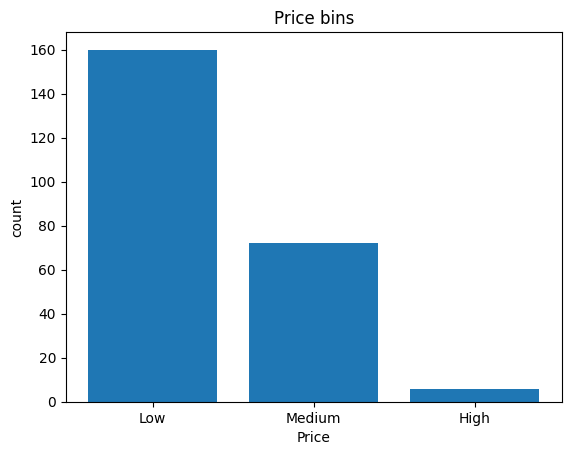

In [22]:
plt.bar(group_names, lp["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

Converting the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.

In [23]:
dummy_variable_1=pd.get_dummies(lp['Screen'])
dummy_variable_1

,Full HD,IPS Panel
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
233,0,1
234,1,0
235,0,1
236,1,0


In [24]:
dummy_variable_1.rename(columns={"Full HD":"Screen-IPS_panel","IPS Panel":"Screen-Full_HD"},inplace=True)

In [25]:
lp=pd.concat([lp,dummy_variable_1], axis=1)

In [26]:
lp.drop('Screen',axis=1,inplace=True)

In [27]:
lp.head(10)

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-IPS_panel,Screen-Full_HD
0,0,Acer,4,2,1,5,14.0,0.55,8,256,3.53,978,Low,0,1
1,1,Dell,3,1,1,3,15.6,0.69,4,256,4.85,634,Low,1,0
2,2,Dell,3,1,1,7,15.6,0.93,8,256,4.85,946,Low,1,0
3,3,Dell,4,2,1,5,13.3,0.55,8,128,2.69,1244,Low,0,1
4,4,HP,4,2,1,7,15.6,0.62,8,256,4.21,837,Low,1,0
5,5,Dell,3,1,1,5,15.6,0.55,8,256,4.85,1016,Low,1,0
6,6,HP,3,3,1,5,15.6,0.55,8,256,4.63,1117,Low,1,0
7,7,Acer,3,2,1,5,15.0,0.55,4,256,4.85,866,Low,0,1
8,8,Dell,3,1,1,5,15.6,0.86,4,256,5.07,812,Low,1,0
9,9,Acer,3,3,1,7,15.0,0.62,8,256,4.85,1068,Low,0,1


Regression plots for each of the parameters "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price".

Calculating the value of correlation of each feature with "Price".

<Axes: xlabel='CPU_frequency', ylabel='Price'>

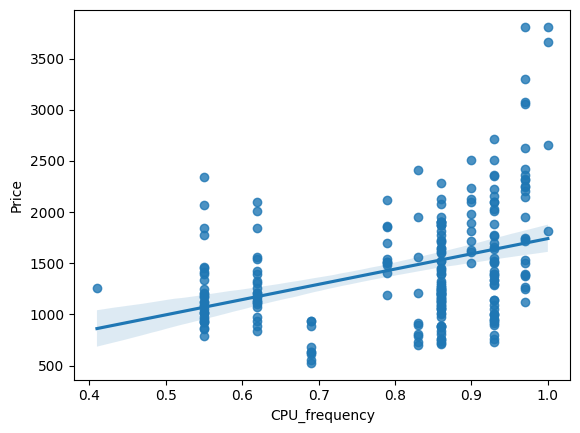

In [28]:
sns.regplot(x='CPU_frequency', y='Price', data=lp)

<Axes: xlabel='Screen_Size_inch', ylabel='Price'>

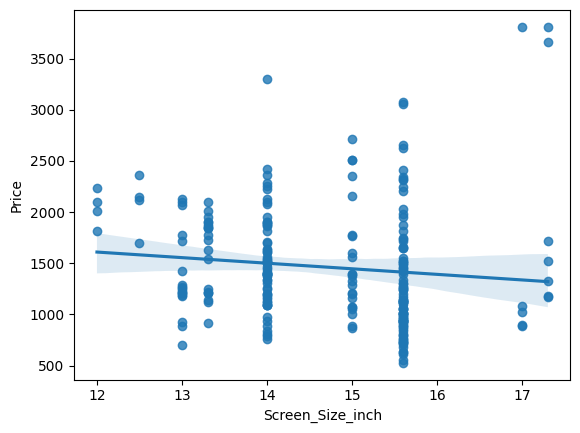

In [29]:
sns.regplot(x='Screen_Size_inch', y='Price', data=lp)

<Axes: xlabel='Weight_pounds', ylabel='Price'>

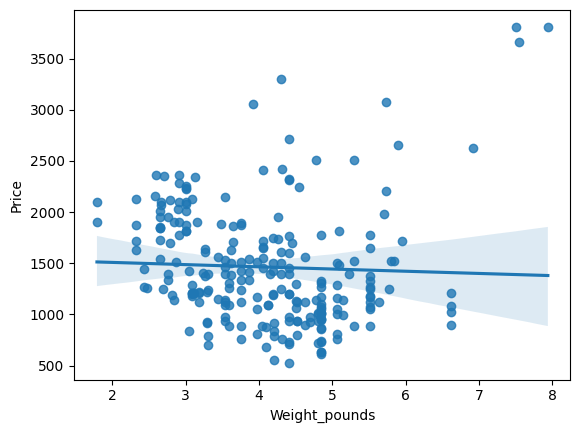

In [30]:
sns.regplot(x='Weight_pounds', y='Price', data=lp)

In [31]:
lp[["CPU_frequency","Price"]].corr()

,CPU_frequency,Price
CPU_frequency,1.000000,0.370052
Price,0.370052,1.000000


In [32]:
lp[["Screen_Size_inch","Price"]].corr()

,Screen_Size_inch,Price
Screen_Size_inch,1.000000,-0.110644
Price,-0.110644,1.000000


In [33]:
lp[["Weight_pounds","Price"]].corr()

,Weight_pounds,Price
Weight_pounds,1.000000,-0.040706
Price,-0.040706,1.000000


Generating box plots to analyse categorical features "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"

<Axes: xlabel='Category', ylabel='Price'>

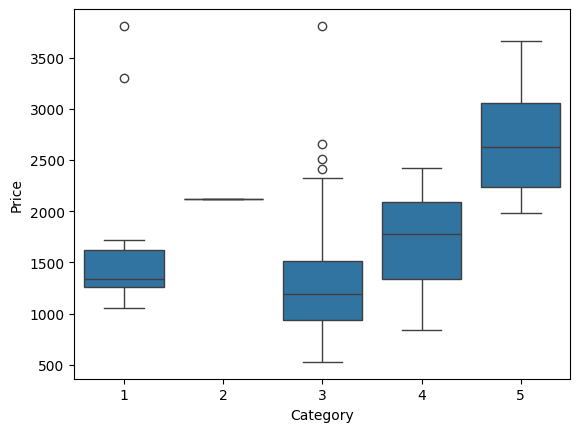

In [34]:
sns.boxplot(x="Category", y="Price", data=lp)

<Axes: xlabel='GPU', ylabel='Price'>

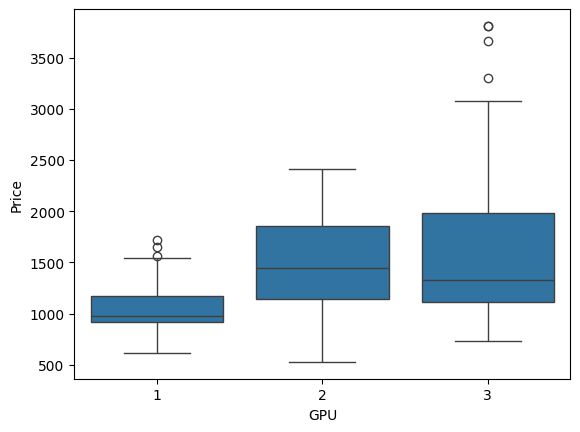

In [35]:
sns.boxplot(x="GPU", y="Price", data=lp)

<Axes: xlabel='OS', ylabel='Price'>

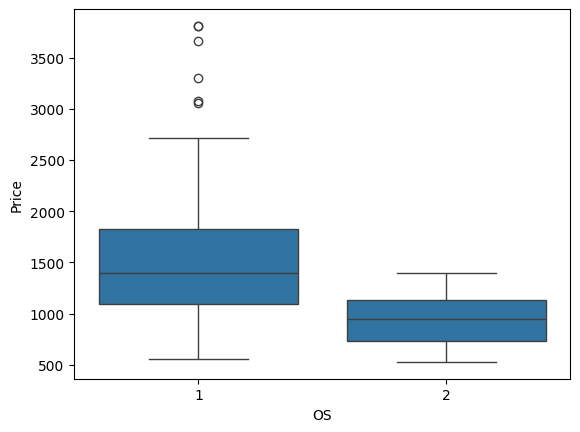

In [36]:
sns.boxplot(x="OS", y="Price", data=lp)

<Axes: xlabel='CPU_core', ylabel='Price'>

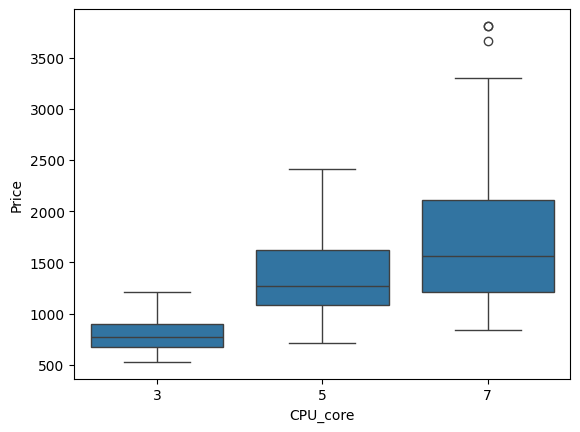

In [37]:
sns.boxplot(x="CPU_core", y="Price", data=lp)

<Axes: xlabel='RAM_GB', ylabel='Price'>

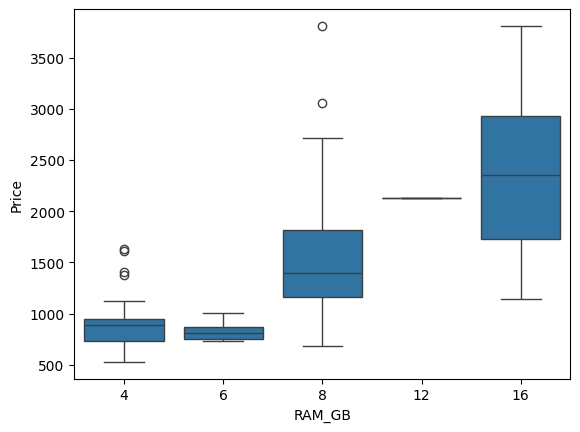

In [38]:
sns.boxplot(x="RAM_GB", y="Price", data=lp)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

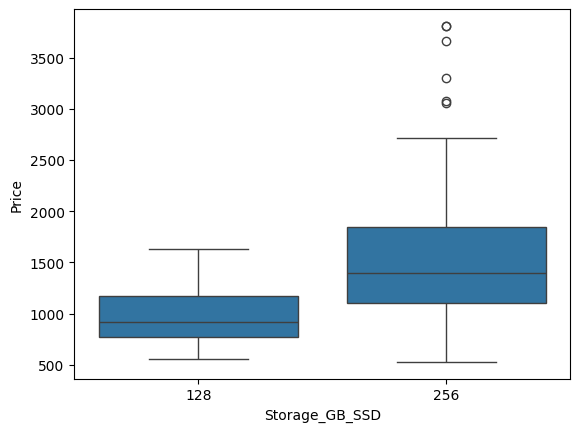

In [39]:
sns.boxplot(x="Storage_GB_SSD", y="Price", data=lp)

 GroupBy and Pivot Tables
 Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualizing this connection using the pcolor plot.

In [40]:
param=lp[["GPU","CPU_core","Price"]]
group_para=param.groupby(["GPU", "CPU_core"],as_index=False).mean()
group_para

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [41]:
grouped_pivot = group_para.pivot(index='GPU',columns='CPU_core')
print(grouped_pivot)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


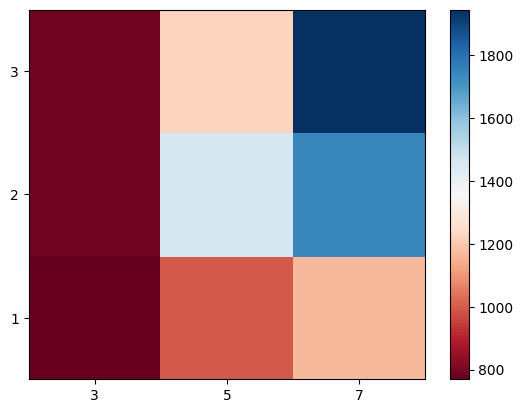

In [42]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

Pearson Correlation and p-values

In [43]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
  pearson_coef,p_value=stats.pearsonr(lp[param],lp['Price'])
  print(param)
  print("Pearson Coefficient is",pearson_coef,"with P Value is",p_value,"\n")

RAM_GB
Pearson Coefficient is 0.5492972971857844 with P Value is 3.681560628842868e-20 

CPU_frequency
Pearson Coefficient is 0.37005242437336433 with P Value is 3.8800726795211155e-09 

Storage_GB_SSD
Pearson Coefficient is 0.2434207552181029 with P Value is 0.00014898923191724174 

Screen_Size_inch
Pearson Coefficient is -0.11064420817118263 with P Value is 0.08853397846830766 

Weight_pounds
Pearson Coefficient is -0.04070574139989346 with P Value is 0.5320166893553013 

CPU_core
Pearson Coefficient is 0.4593977773355115 with P Value is 7.912950127009034e-14 

OS
Pearson Coefficient is -0.22172980114827384 with P Value is 0.0005696642559246749 

GPU
Pearson Coefficient is 0.2882981988881428 with P Value is 6.166949698364282e-06 

Category
Pearson Coefficient is 0.28624275581264125 with P Value is 7.225696235806733e-06 



CPU_frequency" is the parameter with the lowest p-value among the different features of the dataset. Creating a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
lr=LinearRegression()

In [46]:
x=lp[['CPU_frequency']]
y=lp['Price']
lr.fit(x,y)
y_predict=lr.predict(x)
y_predict[0:5]

array([1069.88629123, 1278.54607703, 1636.24856698, 1069.88629123,
       1174.21618413])

<ipython-input-57-5d66d6c814dc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(lp['Price'], hist=False, color="r", label="Actual Value")
<ipython-input-57-5d66d6c814dc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_predict, hist=False, color="b", label="Fitted Valu

<Axes: xlabel='Price', ylabel='Density'>

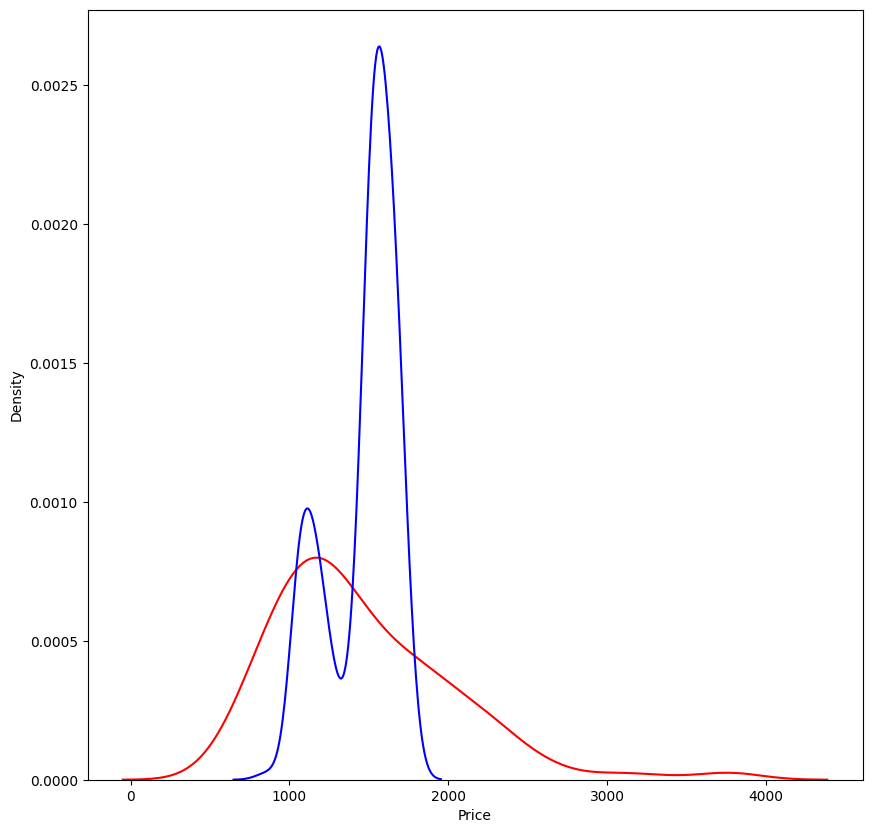

In [57]:
plt.figure(figsize=(10,10))
ax1 = sns.distplot(lp['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(y_predict, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [60]:
print("Mean Squared value is:", mean_squared_error(lp['Price'],y_predict))

Mean Squared value is: 283763.06357108493


In [61]:
print('The R-square is: ', lr.score(x, y))

The R-square is:  0.13693879678460485


In [63]:
lm1 = LinearRegression()
Z = lp[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
lm1.fit(Z,y)
Y_hat = lm1.predict(Z)

<ipython-input-64-adc4ea9b4119>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(lp['Price'], hist=False, color="r", label="Actual Value")
<ipython-input-64-adc4ea9b4119>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" 

Text(0, 0.5, 'Proportion of laptops')

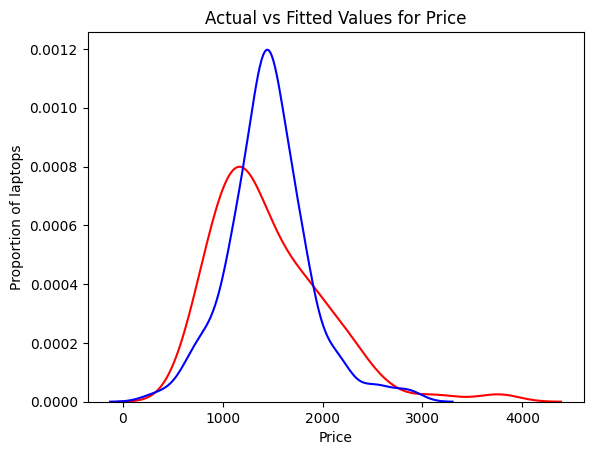

In [64]:
ax1 = sns.distplot(lp['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

In [65]:
print("Mean Squared value is:", mean_squared_error(lp['Price'],Y_hat))

Mean Squared value is: 161350.38786372586


In [66]:
print('The R-square is: ', lm1.score(Z, y))

The R-square is:  0.5092551576782178


Using the variable "CPU_frequency" to create Polynomial features. 3 different values of polynomial degrees is calculated

In [67]:
x = x.to_numpy().flatten()
f1 = np.polyfit(x, y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(x, y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(x, y, 5)
p5 = np.poly1d(f5)

In [68]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

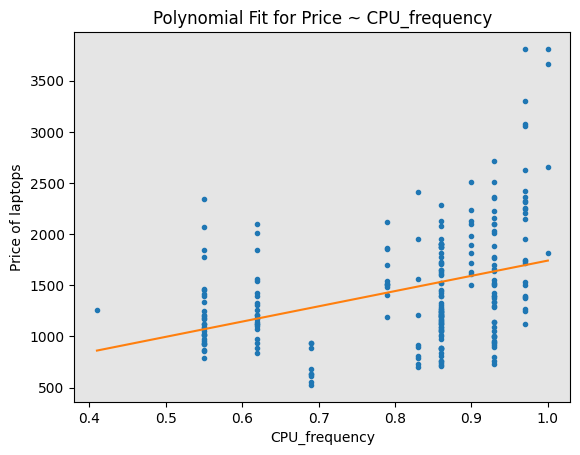

In [70]:

PlotPolly(p1, x, y, 'CPU_frequency')

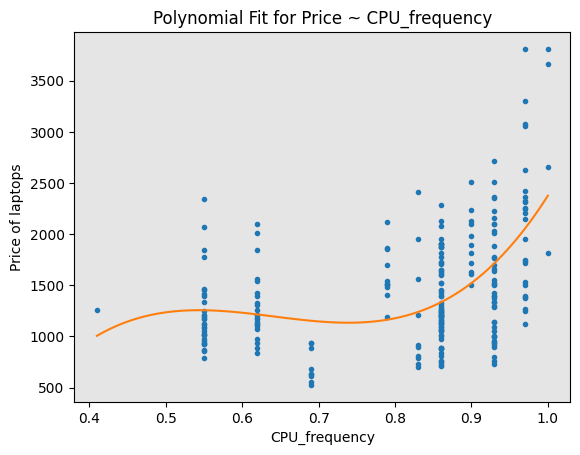

In [71]:
PlotPolly(p3, x, y, 'CPU_frequency')

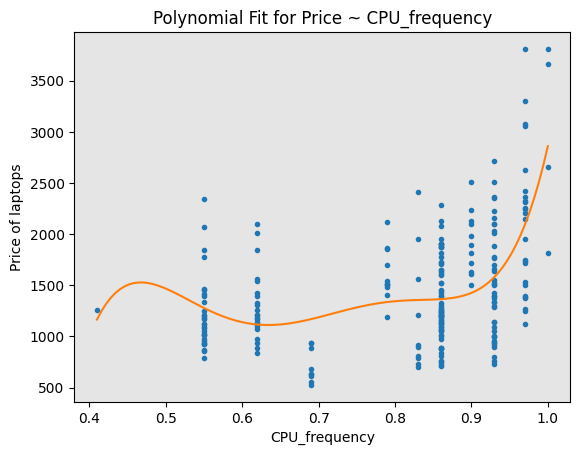

In [72]:
PlotPolly(p5, x, y, 'CPU_frequency')

In [73]:
r_squared_1 = r2_score(y, p1(x))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(y,p1(x)))
r_squared_3 = r2_score(y, p3(x))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(y,p3(x)))
r_squared_5 = r2_score(y, p5(x))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(y,p5(x)))

The R-square value for 1st degree polynomial is:  0.13693879678460485
The MSE value for 1st degree polynomial is:  283763.06357108493
The R-square value for 3rd degree polynomial is:  0.27170079988844564
The MSE value for 3rd degree polynomial is:  239455.10637030436
The R-square value for 5th degree polynomial is:  0.3056341234464277
The MSE value for 5th degree polynomial is:  228298.28016367124


Pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression

In [74]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)

In [75]:
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(y, ypipe))

MSE for multi-variable polynomial pipeline is:  122273.31591386555
R^2 for multi-variable polynomial pipeline is:  0.6281074998779008
